In [1]:
import pandas as pd
import re

from datetime import datetime

In [2]:
jayDat = pd.read_csv('jayavel_GetItForMeData.csv')
jayDat.head(2)

,Unnamed: 0,Transaction Number,Document Type,Title,Author,Status,Status Date
0,0,1699024,Book,Structure and bonding in crystalline materials /,"Rohrer, Gregory S.",Request Finished,3/15/2010 8:29:59 AM
1,1,1738246,Book,Lattice-gas cellular automata and lattice Bolt...,"Wolf-Gladrow, Dieter A.,",Request Finished,3/11/2010 9:36:44 AM


In [3]:
titles = jayDat['Title'].tolist()

def stripStringDateTime(stringTime):
    return datetime.strptime(stringTime,  '%m/%d/%Y %I:%M:%S %p')

In [4]:
jayDat['DateTime'] = jayDat['Status Date'].apply(lambda x : stripStringDateTime(x) )
jayDat.DateTime[:2]

0   2010-03-15 08:29:59
1   2010-03-11 09:36:44
Name: DateTime, dtype: datetime64[ns]

In [5]:
jayDat.index=jayDat['DateTime']
jayDat.tail(2)

,Unnamed: 0,Transaction Number,Document Type,Title,Author,Status,Status Date,DateTime
DateTime,,,,,,,,
2017-05-20 04:48:23,524,3279879,Article,Archives internationales de pharmacodynamie et...,"Teorell, Torsten",Request Finished,5/20/2017 4:48:23 AM,2017-05-20 04:48:23
2017-05-05 12:51:51,525,3287350,Book,Williams hematology,"Beutler, Ernest,",Request Finished,5/5/2017 12:51:51 PM,2017-05-05 12:51:51


In [6]:
def getWords(datFrame):
    titles = datFrame['Title'].tolist()
    if not titles:
        return []
    else: 
        titles = [re.sub('[^A-Za-z0-9]+', ' ', title) for title in titles]
        titlesJoined = " ".join(titles)
        wordList = re.sub("[^\w]", " ",  titlesJoined).split()
        return wordList

In [8]:
print getWords(jayDat)[:5]

words_all = getWords(jayDat)
print words_all[:5]

['Structure', 'and', 'bonding', 'in', 'crystalline']
['Structure', 'and', 'bonding', 'in', 'crystalline']


In [9]:
years = range(2010,2018)
#years = range(2016,2017)
months = range(1,13)
print years
print months

words_dict = {}
for year in years:
    words_dict[str(year)] = {}
    for month in months: 
        # print str(year), str(month)
        words_dict[str(year)][str(month)] = getWords(jayDat[ (jayDat.index.year == year) & 
                                                             (jayDat.index.month == month) ])

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [10]:
words_dict['2010']['4'][:50]

['Markov', 'chain', 'Monte', 'Carlo', 'in', 'practice']

In [11]:
from wordcloud import WordCloud 

import matplotlib.pyplot as plt
# %pylab inline
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,10)

In [12]:
from wordcloud import (WordCloud, get_single_color_func)

class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

In [13]:
wc = WordCloud(width=3000,height=3000,background_color='white').generate(" ".join(words_all))

In [21]:
# Plot
def plotFigure(wc, year, month, saveFlag):
    plt.figure(figsize=(20, 20))
    #plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    
    fName = 'Photos (1)/'+str(year)+'_'+str(month)+'.png'
    print fName
    if saveFlag:
        plt.savefig(fName)
    
    #plt.show()
    plt.close()
    
def getSlectiveColoredWordCloud(words_dict, year, month, wc):
    #print words_dict[year][:2]
    color_to_words = {
                    'red' : words_dict[str(year)][str(month)]
                }

    default_color = 'grey'
    grouped_color_func = GroupedColorFunc(color_to_words, default_color)
    wc.recolor(color_func=grouped_color_func)
    return wc


Photos (1)/2010_10.png


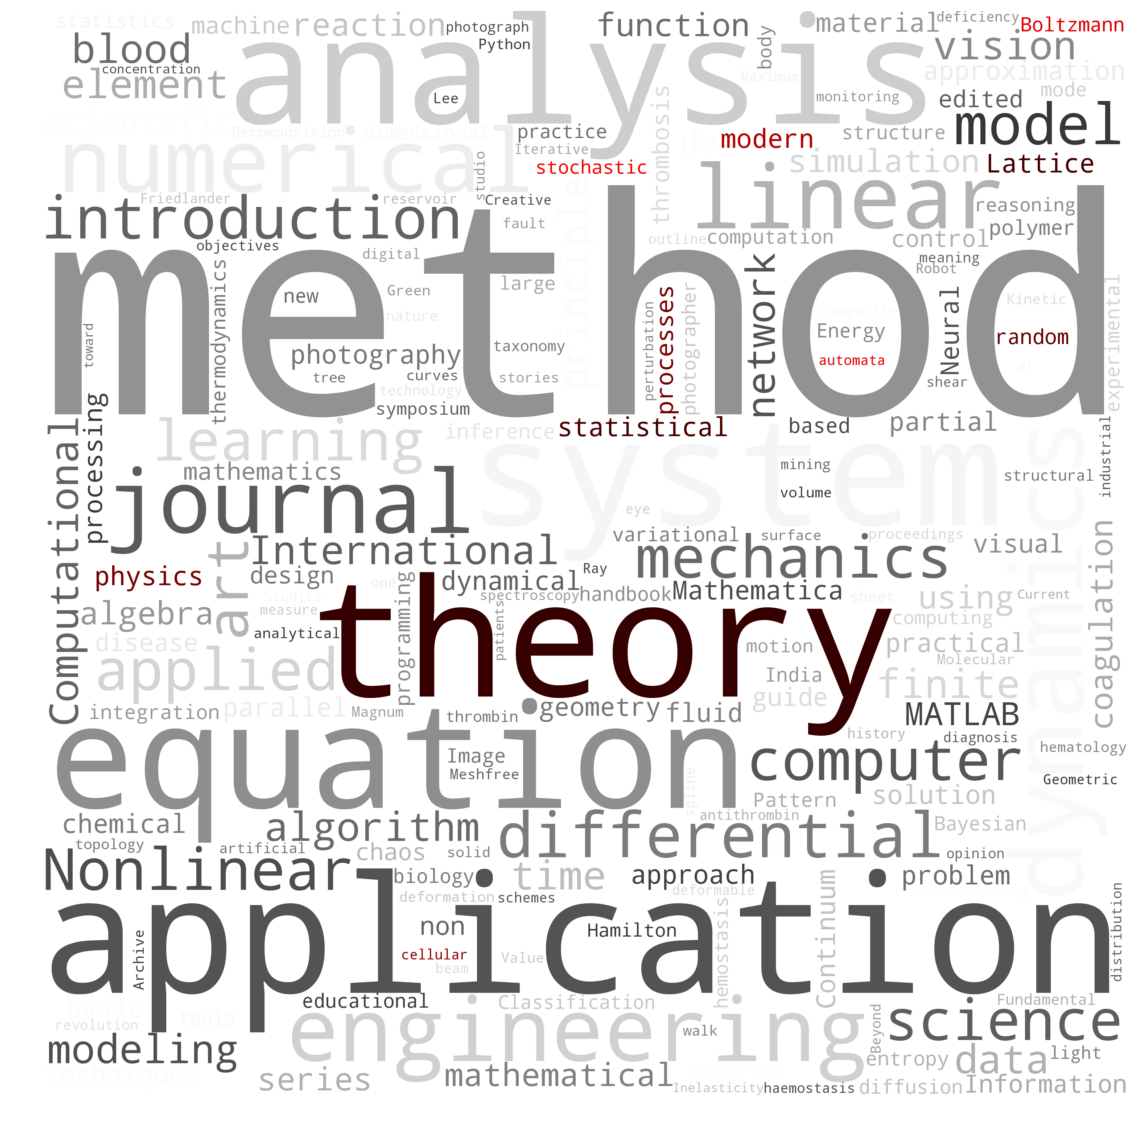

Photos (1)/2010_10.png


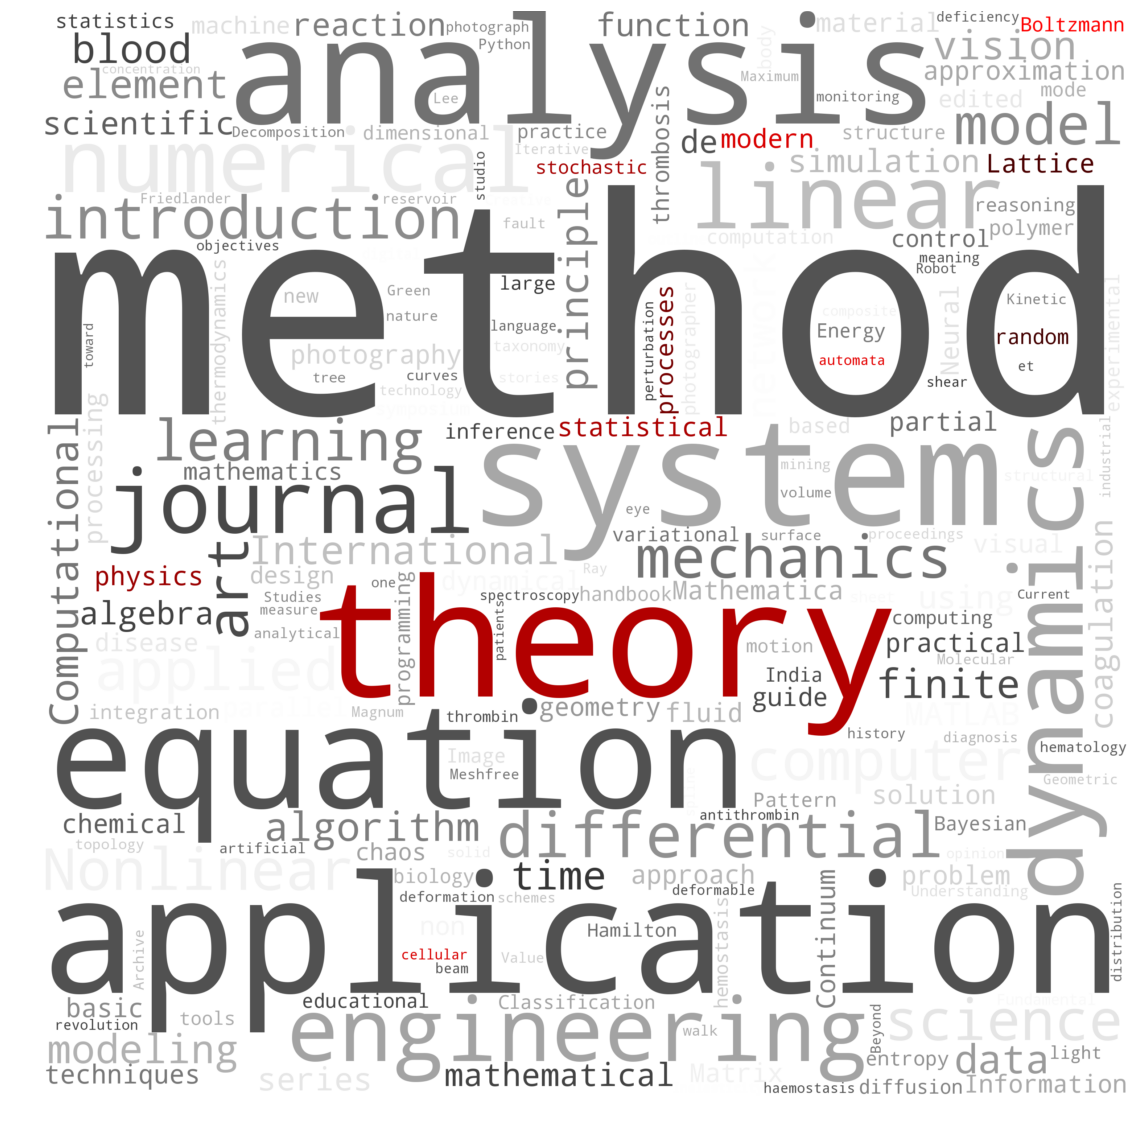

In [20]:
plotFigure(wc,2010,10,0)
wc = getSlectiveColoredWordCloud(words_dict,2010,10,wc)
plotFigure(wc,2010,10,0)

In [22]:
print years
print months

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [23]:
saveFig = 1

for year in years:
    for month in months:
        wc = getSlectiveColoredWordCloud(words_dict, year, month, wc) 
        plotFigure(wc, year, month, saveFig)

Photos (1)/2010_1.png
Photos (1)/2010_2.png
Photos (1)/2010_3.png
Photos (1)/2010_4.png
Photos (1)/2010_5.png
Photos (1)/2010_6.png
Photos (1)/2010_7.png
Photos (1)/2010_8.png
Photos (1)/2010_9.png
Photos (1)/2010_10.png
Photos (1)/2010_11.png
Photos (1)/2010_12.png
Photos (1)/2011_1.png
Photos (1)/2011_2.png
Photos (1)/2011_3.png
Photos (1)/2011_4.png
Photos (1)/2011_5.png
Photos (1)/2011_6.png
Photos (1)/2011_7.png
Photos (1)/2011_8.png
Photos (1)/2011_9.png
Photos (1)/2011_10.png
Photos (1)/2011_11.png
Photos (1)/2011_12.png
Photos (1)/2012_1.png
Photos (1)/2012_2.png
Photos (1)/2012_3.png
Photos (1)/2012_4.png
Photos (1)/2012_5.png
Photos (1)/2012_6.png
Photos (1)/2012_7.png
Photos (1)/2012_8.png
Photos (1)/2012_9.png
Photos (1)/2012_10.png
Photos (1)/2012_11.png
Photos (1)/2012_12.png
Photos (1)/2013_1.png
Photos (1)/2013_2.png
Photos (1)/2013_3.png
Photos (1)/2013_4.png
Photos (1)/2013_5.png
Photos (1)/2013_6.png
Photos (1)/2013_7.png
Photos (1)/2013_8.png
Photos (1)/2013_9.png
P

In [24]:
from PIL import ImageSequence
from PIL import Image

import gifmaker
import glob, os

import re

In [25]:
def tryint(s):
    try:
        return int(s)
    except:
        return s

def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def sort_nicely(l):
    """ Sort the given list in the way that humans expect.
    """
    l.sort(key=alphanum_key)

In [26]:
fileNames = glob.glob("Getitforme/*.png")
print fileNames[:5]
sort_nicely(fileNames)
print fileNames[:5]

['Getitforme/2010_1.png', 'Getitforme/2010_10.png', 'Getitforme/2010_11.png', 'Getitforme/2010_12.png', 'Getitforme/2010_2.png']
['Getitforme/2010_1.png', 'Getitforme/2010_2.png', 'Getitforme/2010_3.png', 'Getitforme/2010_4.png', 'Getitforme/2010_5.png']


In [27]:
import imageio
images = []
for filename in fileNames:
    images.append(imageio.imread(filename))
    
kargs = { 'duration': 1 }
imageio.mimsave('Getitforme/movie.gif', images, **kargs)